# Predicting Client Subscription to Term Deposits 
### Based on Marketing and Contact Features

### Classification Goal:

**The goal is to predict if the client will subscribe (yes/no) to a term deposit (variable y).**

# Data Dictionary
| **Feature** | **Description** | **Type** | **Values/Range** |
|-------------|-----------------|----------|------------------|
| **age**     | Age of the client | Numeric | Continuous       |
| **job**     | Type of job | Categorical | "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed" |
| **marital** | Marital status | Categorical | "married", "divorced", "single" (Note: "divorced" includes divorced or widowed) |
| **education** | Level of education | Categorical | "unknown", "secondary", "primary", "tertiary" |
| **default** | Whether the client has credit in default | Binary | "yes", "no" |
| **balance** | Average yearly balance in euros | Numeric | Continuous       |
| **housing** | Whether the client has a housing loan | Binary | "yes", "no" |
| **loan** | Whether the client has a personal loan | Binary | "yes", "no" |
| **contact** | Type of communication used in the last contact | Categorical | "unknown", "telephone", "cellular" |
| **day** | Day of the month when the last contact was made | Numeric | 1-31 |
| **month** | Month of the year when the last contact was made | Categorical | "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec" |
| **duration** | Duration of the last contact in seconds | Numeric | Continuous |
| **campaign** | Number of contacts performed during this campaign for the client (includes the last contact) | Numeric | Continuous |
| **pdays** | Number of days since the client was last contacted in a previous campaign | Numeric | -1 (no prior contact), 0-... (days since last contact) |
| **previous** | Number of contacts made before this campaign for the client | Numeric | Continuous |
| **poutcome** | Outcome of the previous marketing campaign | Categorical | "unknown", "other", "failure", "success" |
| **y** | Subscription status to a term deposit | Binary | "yes", "no" |


# Feature Name Mapping and Data Dictionary

| **Feature** | **Renamed_Feature** | **Description** | **Type** | **Values/Range** |
|-------------------|-----------------|-----------------|----------|------------------|
| age               | Age             | Age of the client | Numeric  | Continuous       |
| job               | Job             | Type of job     | Categorical | "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed" |
| marital           | Marital_status  | Marital status  | Categorical | "married", "divorced", "single" (Note: "divorced" includes divorced or widowed) |
| education         | Education       | Level of education | Categorical | "unknown", "secondary", "primary", "tertiary" |
| default           | Credit_default  | Whether the client has credit in default | Binary   | "yes", "no"      |
| balance           | Balance         | Average yearly balance in euros | Numeric  | Continuous       |
| housing           | Housing_loan    | Whether the client has a housing loan | Binary   | "yes", "no"      |
| loan              | Personal_loan   | Whether the client has a personal loan | Binary   | "yes", "no"      |
| contact           | Contact_mode    | Type of communication used in the last contact | Categorical | "unknown", "telephone", "cellular" |
| day               | Day             | Day of the month when the last contact was made | Numeric  | 1-31             |
| month             | Month           | Month of the year when the last contact was made | Categorical | "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec" |
| duration          | Duration_secs   | Duration of the last contact in seconds | Numeric  | Continuous       |
| campaign          | Campaign_contacts | Number of contacts performed during this campaign for the client (includes the last contact) | Numeric  | Continuous       |
| pdays             | Days_passed     | Number of days since the client was last contacted in a previous campaign | Numeric  | -1 (no prior contact), 0-... (days since last contact) |
| previous          | Contacts_before_campaign | Number of contacts made before this campaign for the client | Numeric  | Continuous       |
| poutcome          | Previous_campaign | Outcome of the previous marketing campaign | Categorical | "unknown", "other", "failure", "success" |
| y                 | Client_term_deposit | Subscription status to a term deposit | Binary   | "yes", "no"      |


# 1. Import Necessary Libraries

In [114]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from matplotlib import pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# 2. Read data

In [115]:
# Read data
# Dataset stored at the location 'MiniProject_2\Bank_Marketing\bank_data.csv'
path = r'C:\Users\Vinitha\Desktop\MiniProject_2\Bank_Marketing\bank_data.csv'
df = pd.read_csv(path)

# 3. Data cleaning and preprocessing

In [116]:
# Head
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [117]:
# Tail
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [118]:
# Shape
df.shape

(4521, 18)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [120]:
# Finding null
df.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [121]:
# Dropping unnecessary columns
df = df.drop([ 'Unnamed: 0'], axis = 1)

In [122]:
# Renaming columns
df = df.rename(columns={
    'age': 'Age',
    'job': 'Job',
    'marital': 'Marital_status',
    'education': 'Education',
    'default': 'Credit_default',
    'balance': 'Balance',
    'housing': 'Housing_loan',
    'contact': 'Contact_mode', 
    'day': 'Day', 
    'month': 'Month',
    'loan': 'Personal_loan',
    'duration': 'Duration_secs',
    'campaign': 'Campaign_contacts',
    'pdays': 'Days_passed',
    'previous': 'Contacts_before_campaign',           
    'poutcome': 'Previous_campaign',
    'y': 'Client_term_deposit'
})

df.head()

,Age,Job,Marital_status,Education,Credit_default,Balance,Housing_loan,Personal_loan,Contact_mode,Day,Month,Duration_secs,Campaign_contacts,Days_passed,Contacts_before_campaign,Previous_campaign,Client_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [123]:
# Selecting the categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Print the categorical features
print("Categorical Features:")
df[categorical_features].head()

Categorical Features:


,Job,Marital_status,Education,Credit_default,Housing_loan,Personal_loan,Contact_mode,Month,Previous_campaign,Client_term_deposit
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [124]:
# Selecting the numerical features
numerical_features = df.select_dtypes(include=['int64','float64']).columns

# Print the categorical features
print("numerical Features:")
df[numerical_features].head()

numerical Features:


,Age,Balance,Day,Duration_secs,Campaign_contacts,Days_passed,Contacts_before_campaign
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [125]:
# Shape
df.shape

(4521, 17)

# 4. Exploratory Data Analysis (EDA)

## 4.1 Basic statistics

In [126]:
# Basic statistics of numerical columns
df.describe().round(2)

,Age,Balance,Day,Duration_secs,Campaign_contacts,Days_passed,Contacts_before_campaign
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


## 4.2 Visualizations

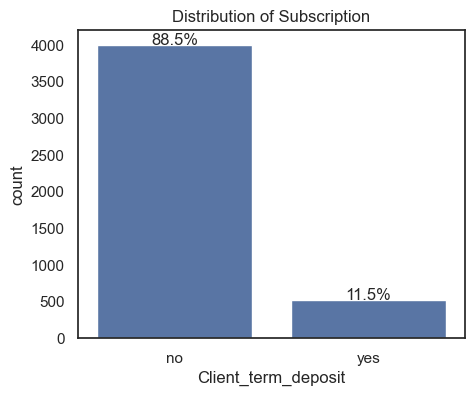

In [127]:
# Plot distribution of the target variable
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Client_term_deposit', data=df)
plt.title('Distribution of Subscription')

# Calculate percentages and annotate the plot
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',
                xytext=(0, -2),
                textcoords='offset points')

plt.show()

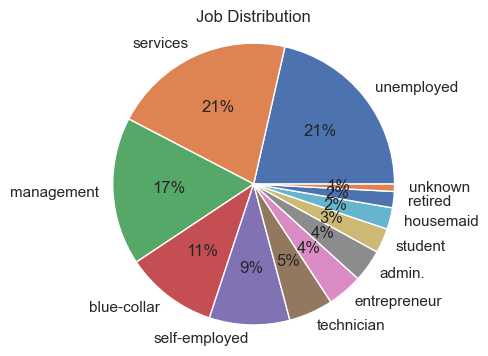

In [128]:
# Pie chart of Job Distribution
plt.figure(figsize=(4, 4))
plt.pie(df['Job'].value_counts(), labels=df['Job'].unique(), autopct='%1.0f%%')
plt.title('Job Distribution')
plt.axis('equal')
plt.show()

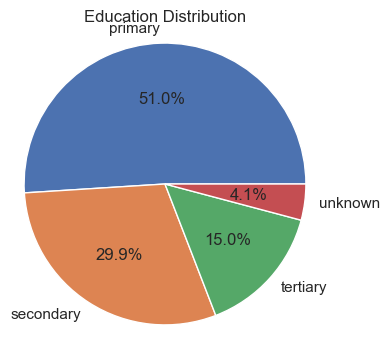

In [129]:
# Pie chart of Education Distribution
plt.figure(figsize=(4, 4))
plt.pie(df['Education'].value_counts(), labels=df['Education'].unique(), autopct='%1.1f%%')
plt.title('Education Distribution')
plt.axis('equal')
plt.show()

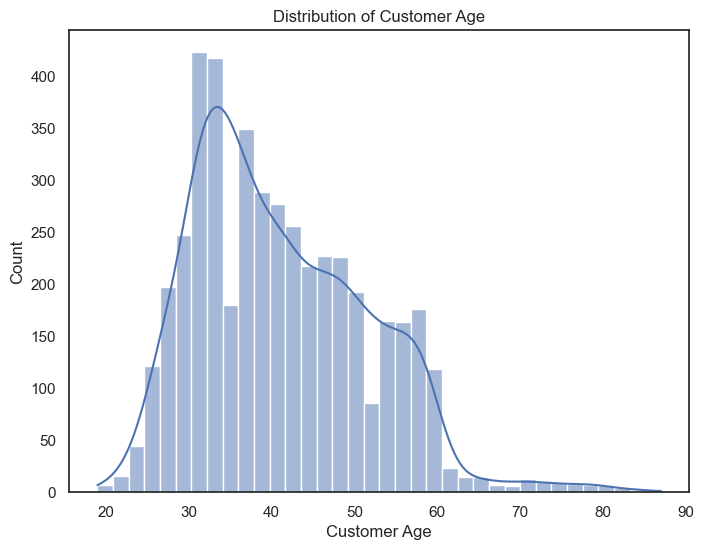

In [130]:
# Histplot of Distribution of Customer Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()

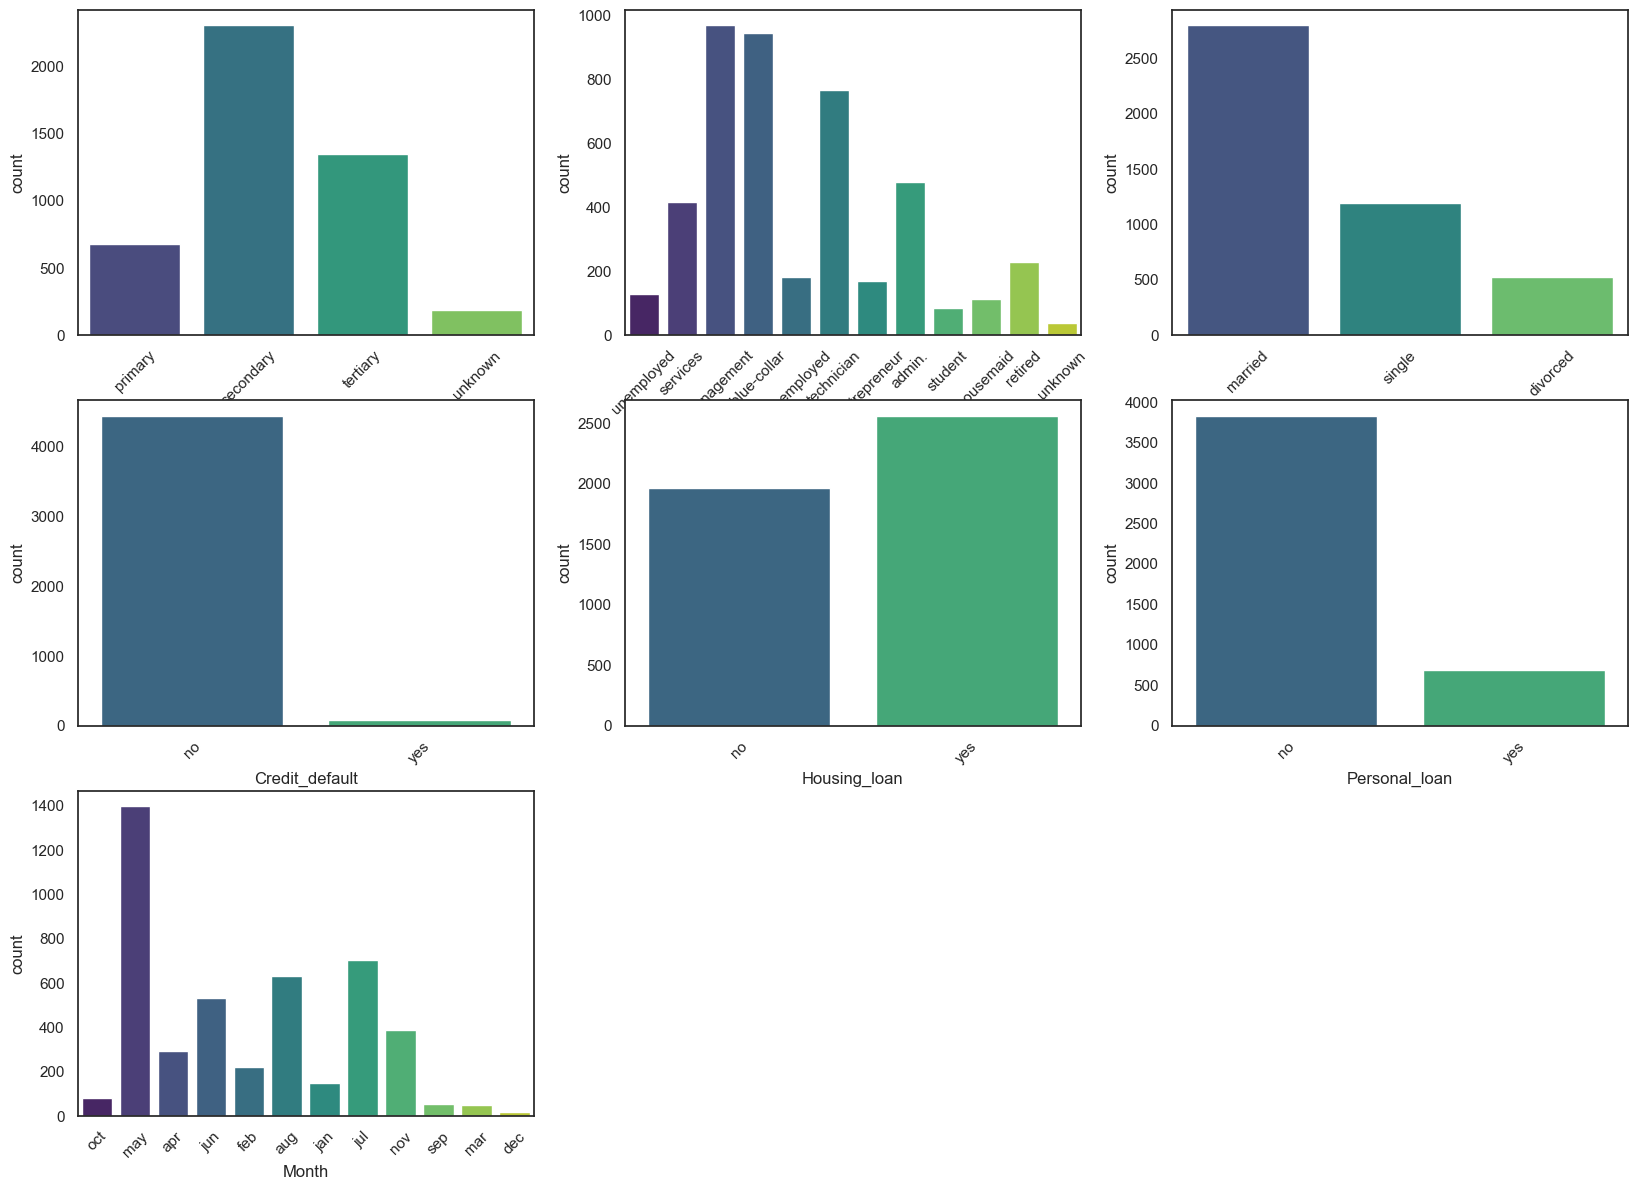

In [131]:
# List of categorical features to plot
categorical_features = ['Education', 'Job', 'Marital_status', 'Credit_default', 'Housing_loan', 'Personal_loan', 'Month']

# Create subplots
plt.figure(figsize=(20,60), facecolor ='white')
plotnumber = 1


# Plot countplots for each categorical feature
for categorical_features in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(x=categorical_features, data=df,palette='viridis')
    plt.xticks(rotation=45)
    plt.xlabel(categorical_features)
    plotnumber += 1
    
plt.show()

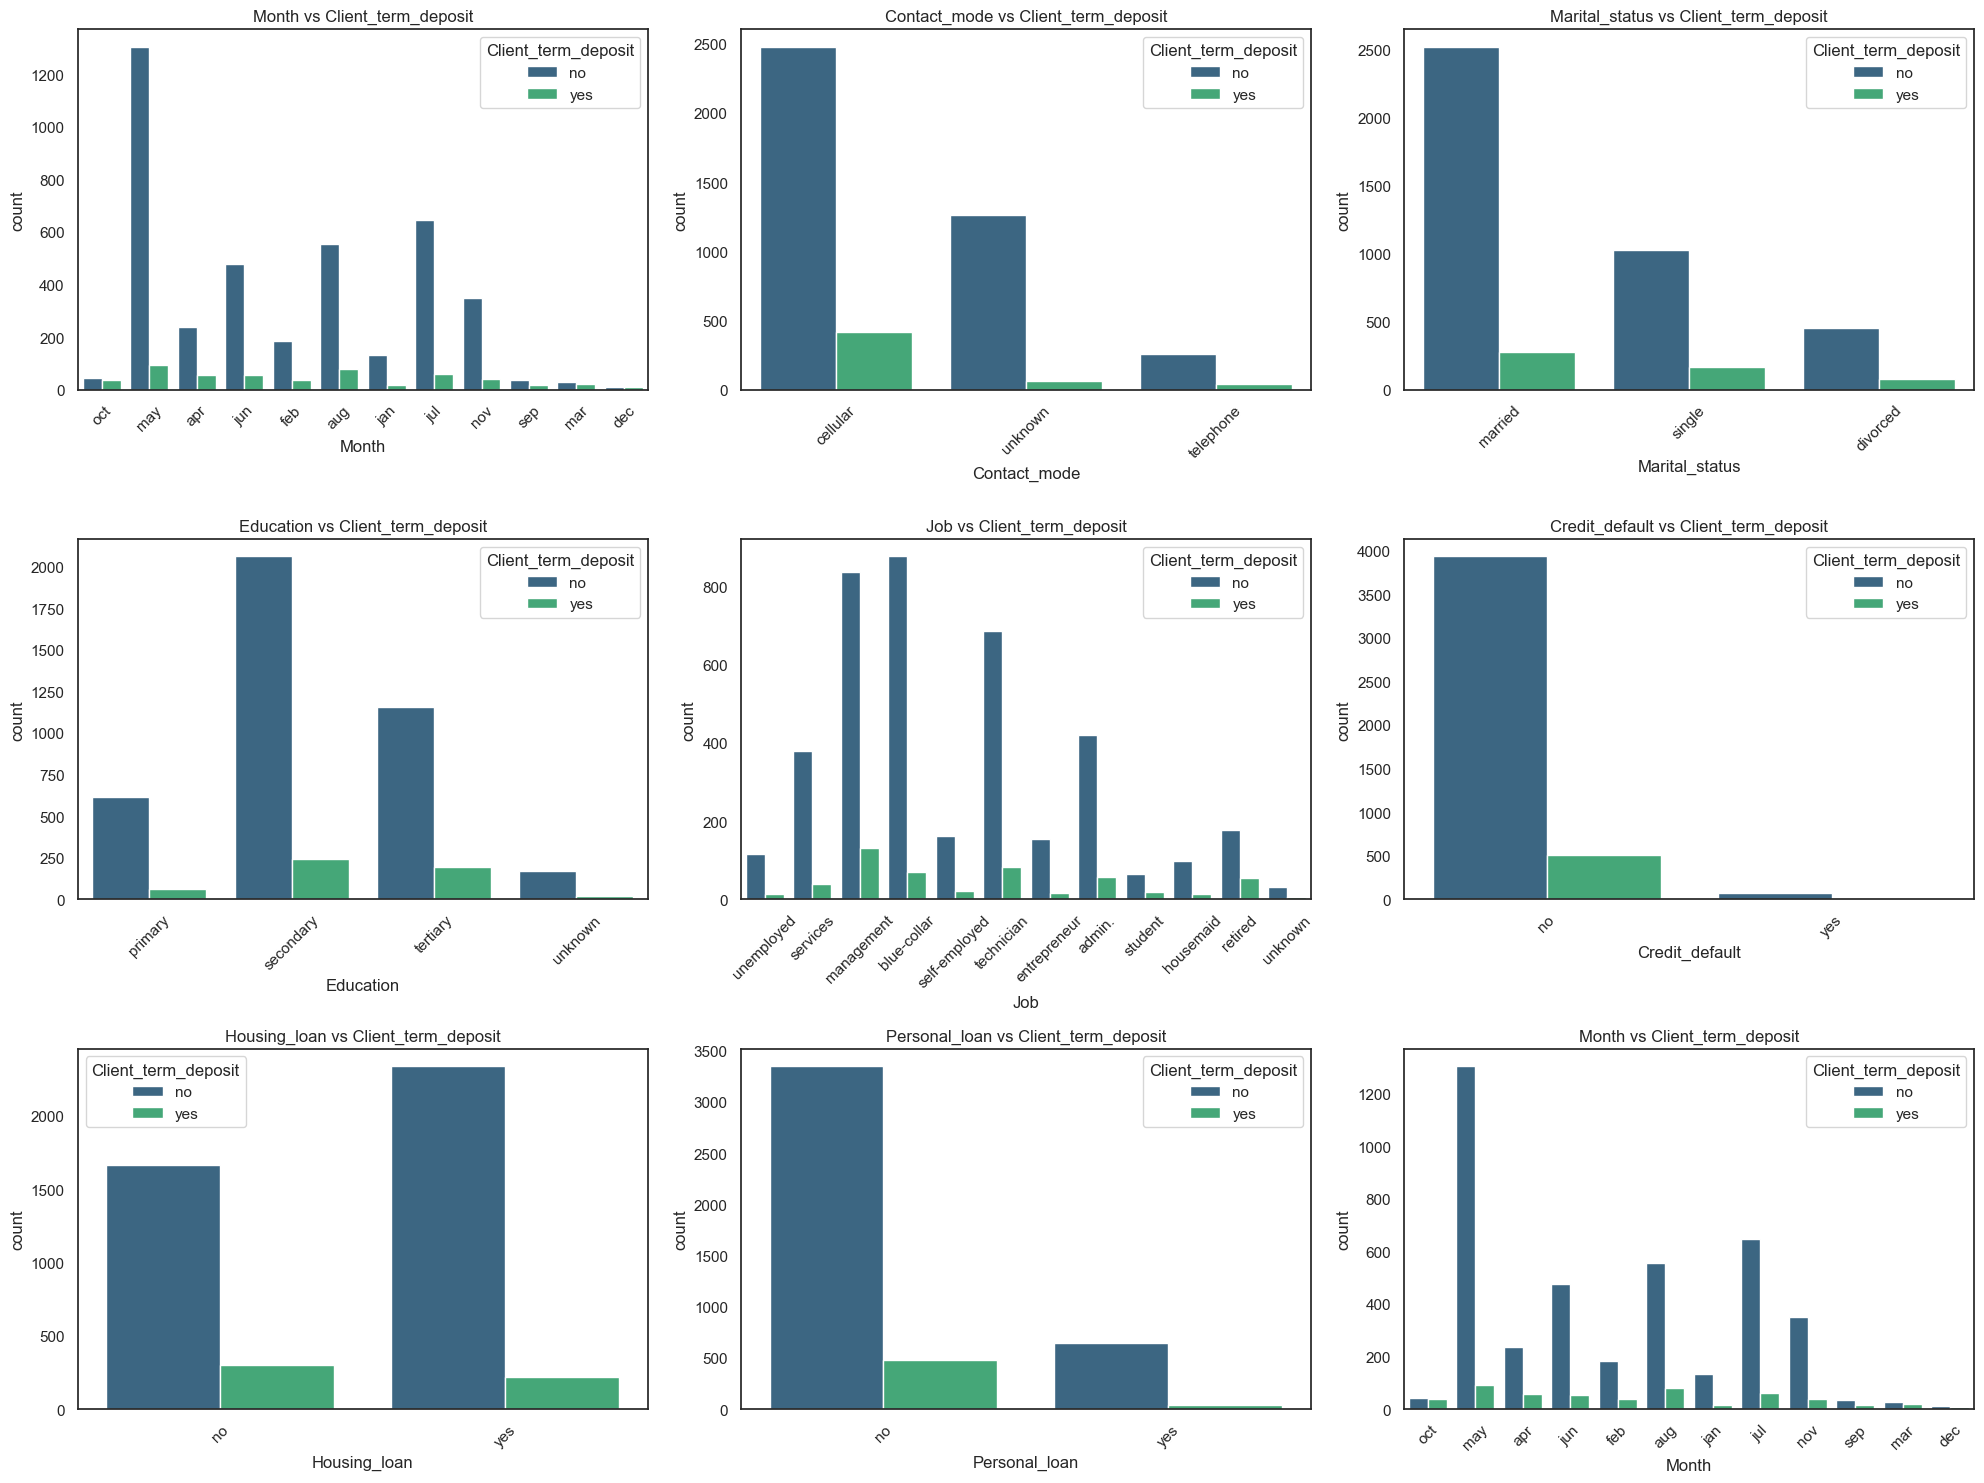

In [132]:
# List of categorical features to plot
categorical_features = ['Month', 'Contact_mode', 'Marital_status','Education', 'Job', 'Credit_default', 'Housing_loan', 'Personal_loan', 'Month']

# Create subplots
plt.figure(figsize=(20, 15))

# Plot count plots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=feature, hue='Client_term_deposit', palette='viridis')
    plt.title(f'{feature} vs Client_term_deposit')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5.3 Correlation matrix

### Mapping dictionary

In [133]:
# Mapping dictionary
bm_map = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3,
    'unknown': np.nan  # Map 'unknown' to NaN
}
df['Education'] = df["Education"].map(bm_map)

In [134]:
# Removing the unknown values in education column
df.isnull().sum()

Age                           0
Job                           0
Marital_status                0
Education                   187
Credit_default                0
Balance                       0
Housing_loan                  0
Personal_loan                 0
Contact_mode                  0
Day                           0
Month                         0
Duration_secs                 0
Campaign_contacts             0
Days_passed                   0
Contacts_before_campaign      0
Previous_campaign             0
Client_term_deposit           0
dtype: int64

In [135]:
# Dropping rows that have nan value
df = df.dropna(subset=['Education'])

In [136]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder   
df = df[['Age', 'Job', 'Marital_status', 'Education', 'Credit_default',
       'Balance', 'Housing_loan', 'Personal_loan', 'Contact_mode', 'Day',
       'Month', 'Duration_secs', 'Campaign_contacts', 'Days_passed',
       'Contacts_before_campaign', 'Previous_campaign', 'Client_term_deposit']].apply(LabelEncoder().fit_transform)

In [137]:
# Correlation matrix
df.corr().round(2)

,Age,Job,Marital_status,Education,Credit_default,Balance,Housing_loan,Personal_loan,Contact_mode,Day,Month,Duration_secs,Campaign_contacts,Days_passed,Contacts_before_campaign,Previous_campaign,Client_term_deposit
Age,1.00,-0.02,-0.38,-0.19,-0.02,0.09,-0.20,-0.01,0.01,-0.02,-0.05,-0.01,0.00,-0.02,-0.00,-0.01,0.04
Job,-0.02,1.00,0.06,0.19,0.01,0.00,-0.12,-0.04,-0.08,0.02,-0.10,-0.01,0.00,-0.03,0.00,0.01,0.03
Marital_status,-0.38,0.06,1.00,0.13,-0.02,0.03,-0.03,-0.05,-0.07,0.01,-0.03,0.01,0.00,0.02,0.04,-0.03,0.02
Education,-0.19,0.19,0.13,1.00,-0.01,0.07,-0.07,-0.02,-0.16,0.02,-0.08,-0.01,0.01,-0.00,0.03,-0.04,0.06
Credit_default,-0.02,0.01,-0.02,-0.01,1.00,-0.13,0.00,0.06,0.01,-0.02,0.01,-0.02,-0.01,-0.02,-0.03,0.04,-0.00
Balance,0.09,0.00,0.03,0.07,-0.13,1.00,-0.04,-0.10,-0.02,-0.01,0.02,0.03,-0.03,0.02,0.05,-0.05,0.07
Housing_loan,-0.20,-0.12,-0.03,-0.07,0.00,-0.04,1.00,0.02,0.20,-0.03,0.27,0.01,-0.01,0.13,0.04,-0.09,-0.10
Personal_loan,-0.01,-0.04,-0.05,-0.02,0.06,-0.10,0.02,1.00,-0.00,-0.00,0.02,-0.00,0.02,-0.03,-0.02,0.03,-0.07
Contact_mode,0.01,-0.08,-0.07,-0.16,0.01,-0.02,0.20,-0.00,1.00,-0.04,0.37,-0.02,0.01,-0.24,-0.19,0.26,-0.13
Day,-0.02,0.02,0.01,0.02,-0.02,-0.01,-0.03,-0.00,-0.04,1.00,-0.02,-0.03,0.17,-0.09,-0.06,0.07,-0.01


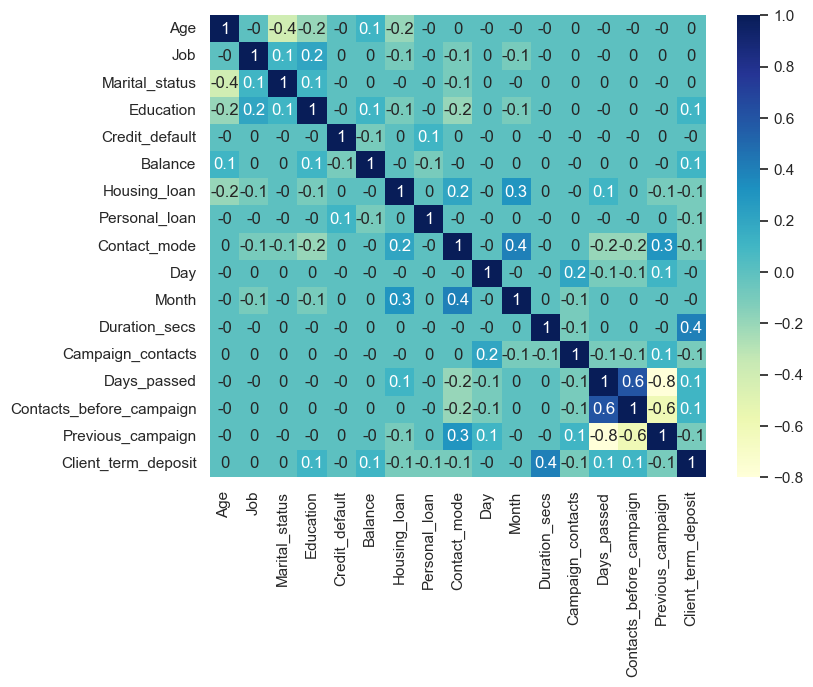

In [138]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(1), annot=True, cmap='YlGnBu')
plt.show()

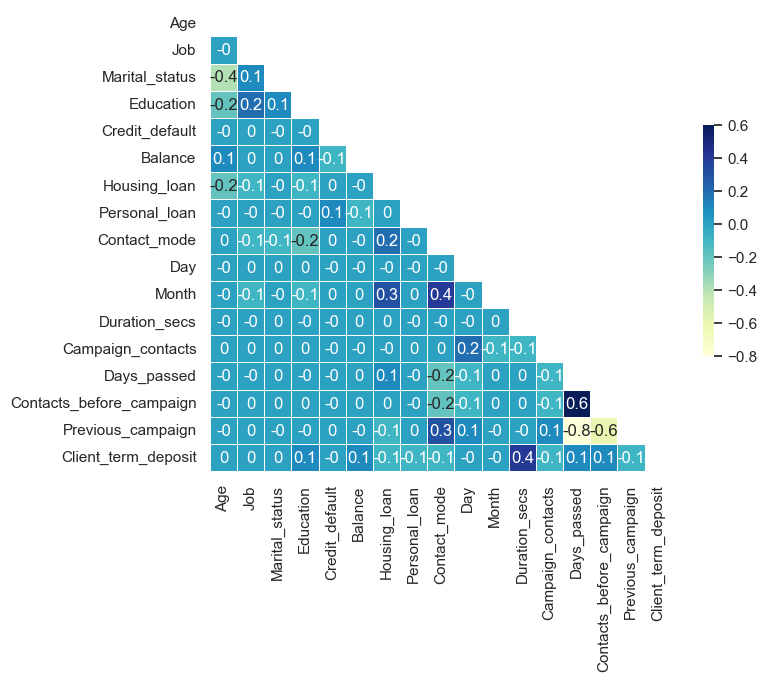

In [139]:
# Heatmap of correlation
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr().round(1), mask=mask, cmap='YlGnBu', square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

# 6. Modelling

In [140]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , roc_curve, auc

In [141]:
# Prepare features and target variable
X = df.drop(columns='Client_term_deposit') # Drop 'Subscription' column to get features
y = df['Client_term_deposit']   # Assign 'Subscription' column as the target variable

In [142]:
# Check shape of X and y
print(f'X shape is {X.shape}')
print(f'y shape is {y.shape}')

X shape is (4334, 16)
y shape is (4334,)


In [143]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Check shape of train and test sets
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (3467, 16)
X_test shape is (867, 16)
y_train shape is (3467,)
y_test shape is (867,)


### 6.1 Logistic Regression

In [145]:
# Correlation 
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [146]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression:
Accuracy: 0.8961937716262975
Precision: 0.6470588235294118
Recall: 0.22
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       767
           1       0.65      0.22      0.33       100

    accuracy                           0.90       867
   macro avg       0.78      0.60      0.64       867
weighted avg       0.88      0.90      0.87       867



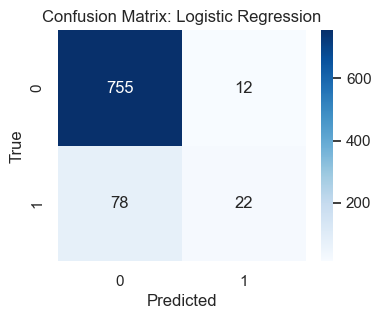

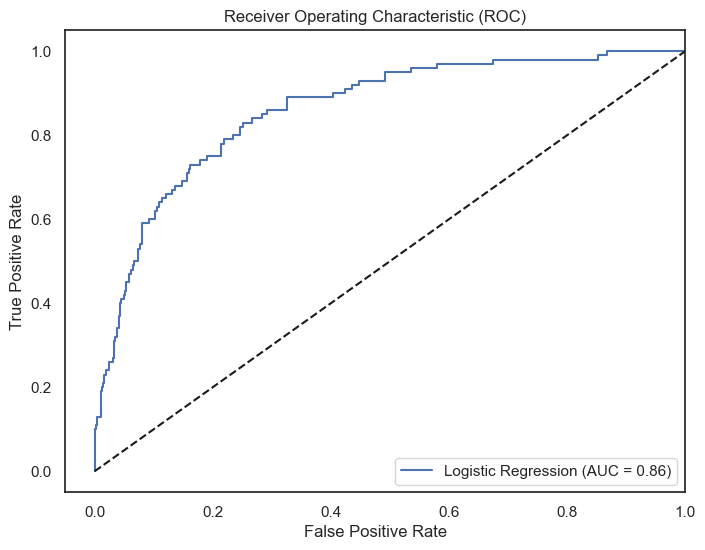

In [147]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_score_lr = lr_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=[8, 6])
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.show()

### 6.2 Support Vector Machines

SVM:
Accuracy: 0.8938869665513264
Precision: 0.75
Recall: 0.12
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       767
           1       0.75      0.12      0.21       100

    accuracy                           0.89       867
   macro avg       0.82      0.56      0.58       867
weighted avg       0.88      0.89      0.86       867



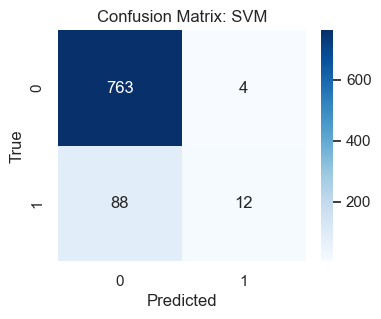

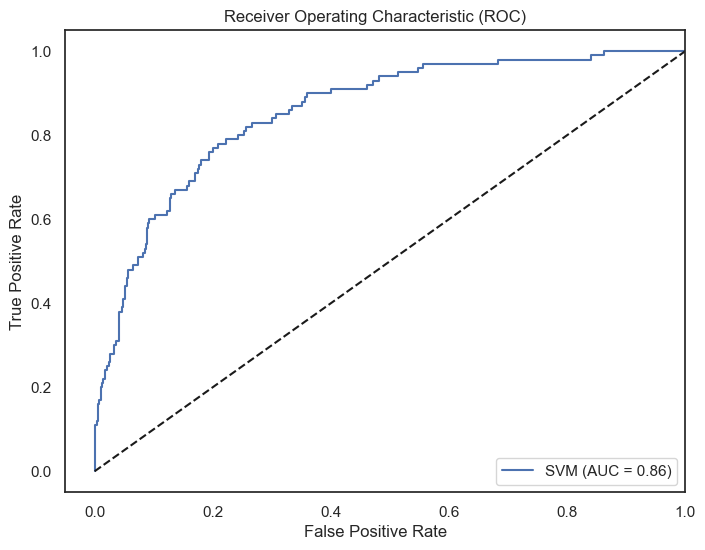

In [148]:
# Support Vector Machines
sv_model = LinearSVC(max_iter=10000)
sv_model.fit(X_train, y_train)

y_pred_sv = sv_model.predict(X_test)
y_score_sv = sv_model.decision_function(X_test)  # For ROC curve

# Metrics
print("SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sv)}")
print(f"Precision: {precision_score(y_test, y_pred_sv)}")
print(f"Recall: {recall_score(y_test, y_pred_sv)}")
print(classification_report(y_test, y_pred_sv))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_sv), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_sv, tpr_sv, _ = roc_curve(y_test, y_score_sv)
roc_auc_sv = auc(fpr_sv, tpr_sv)

plt.figure(figsize=[8, 6])
plt.plot(fpr_sv, tpr_sv, label=f'SVM (AUC = {roc_auc_sv:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### 6.3 Decision Tree

Decision Tree:
Accuracy: 0.8604382929642446
Precision: 0.4146341463414634
Recall: 0.51
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       767
           1       0.41      0.51      0.46       100

    accuracy                           0.86       867
   macro avg       0.67      0.71      0.69       867
weighted avg       0.87      0.86      0.87       867



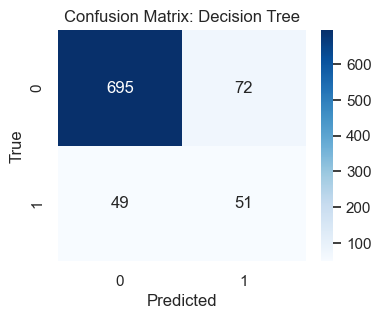

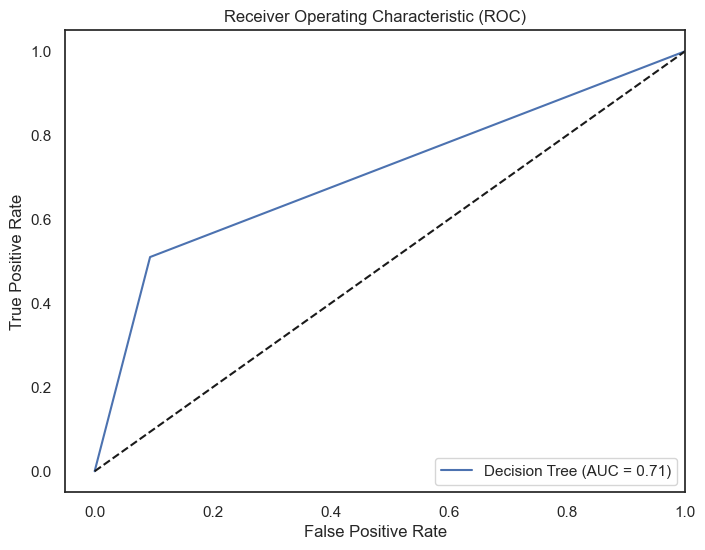

In [149]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_score_dt = dt_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=[8, 6])
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### 6.4 Random Forest

Random Forest:
Accuracy: 0.9019607843137255
Precision: 0.6415094339622641
Recall: 0.34
f1: 0.4444444444444444
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       767
           1       0.64      0.34      0.44       100

    accuracy                           0.90       867
   macro avg       0.78      0.66      0.70       867
weighted avg       0.89      0.90      0.89       867



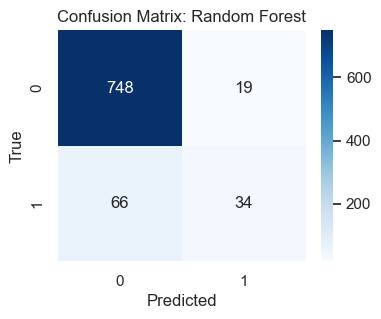

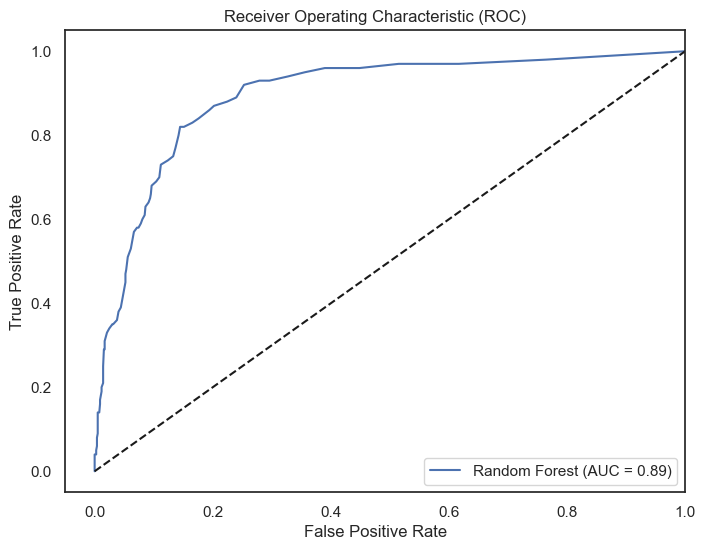

In [150]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_score_rf = rf_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"f1: { f1_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_nb = auc(fpr_rf, tpr_rf)

plt.figure(figsize=[8, 6])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_nb:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### 6.5 Naive Bayes

Naive Bayes:
Accuracy: 0.8650519031141869
Precision: 0.43089430894308944
Recall: 0.53
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       767
           1       0.43      0.53      0.48       100

    accuracy                           0.87       867
   macro avg       0.68      0.72      0.70       867
weighted avg       0.88      0.87      0.87       867



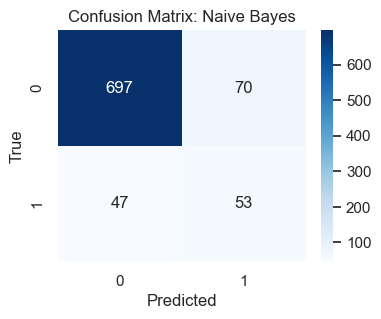

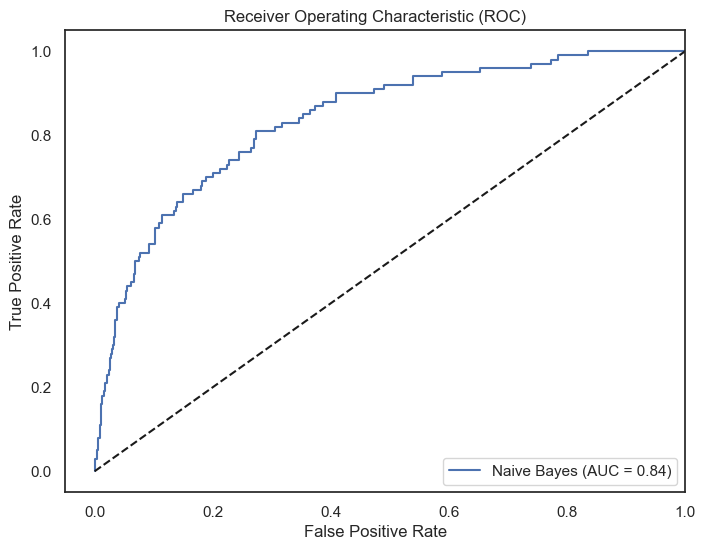

In [151]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_score_nb = nb_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics
print("Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Precision: {precision_score(y_test, y_pred_nb)}")
print(f"Recall: {recall_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc = auc(fpr_nb, tpr_nb)

plt.figure(figsize=[8, 6])
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### 6.6 K Nearest Neighbor

K Nearest Neighbor:
Accuracy: 0.8835063437139562
Precision: 0.4857142857142857
Recall: 0.17
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       767
           1       0.49      0.17      0.25       100

    accuracy                           0.88       867
   macro avg       0.69      0.57      0.59       867
weighted avg       0.85      0.88      0.86       867



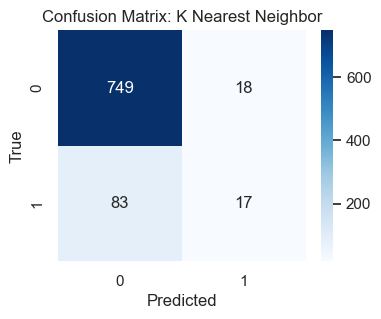

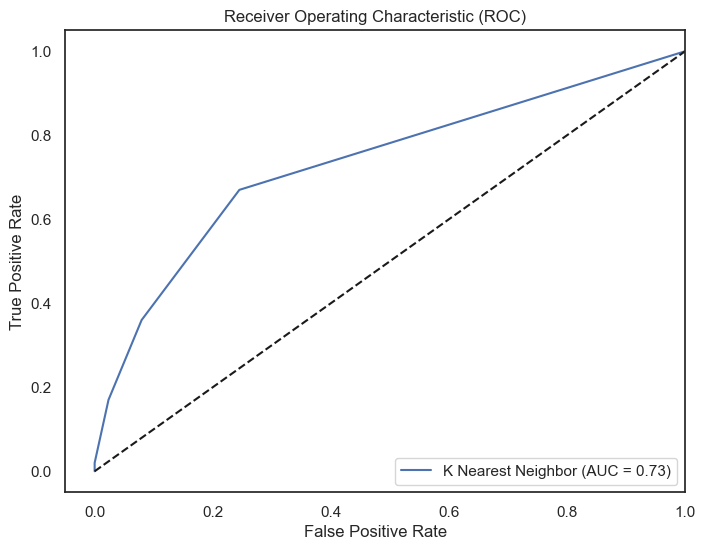

In [152]:
# K Nearest Neighbor
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
y_score_knn = knn_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics
print("K Nearest Neighbor:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: K Nearest Neighbor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=[8, 6])
plt.plot(fpr_knn, tpr_knn, label=f'K Nearest Neighbor (AUC = {roc_auc_knn:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### 6.7 XGBoost

XGBoost:
Accuracy: 0.9077277970011534
Precision: 0.6515151515151515
Recall: 0.43
f1: 0.5180722891566265
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       767
           1       0.65      0.43      0.52       100

    accuracy                           0.91       867
   macro avg       0.79      0.70      0.73       867
weighted avg       0.90      0.91      0.90       867



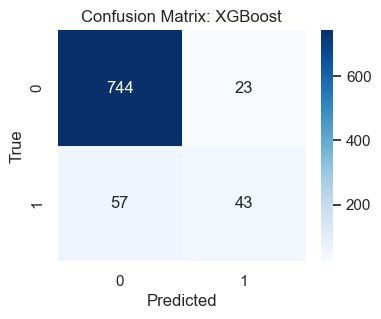

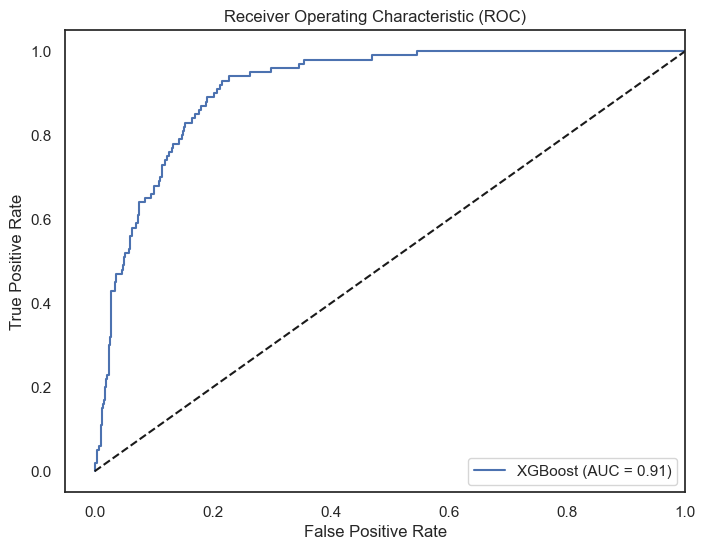

In [153]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics
print("XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"f1: { f1_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=[8, 6])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## ROC curve

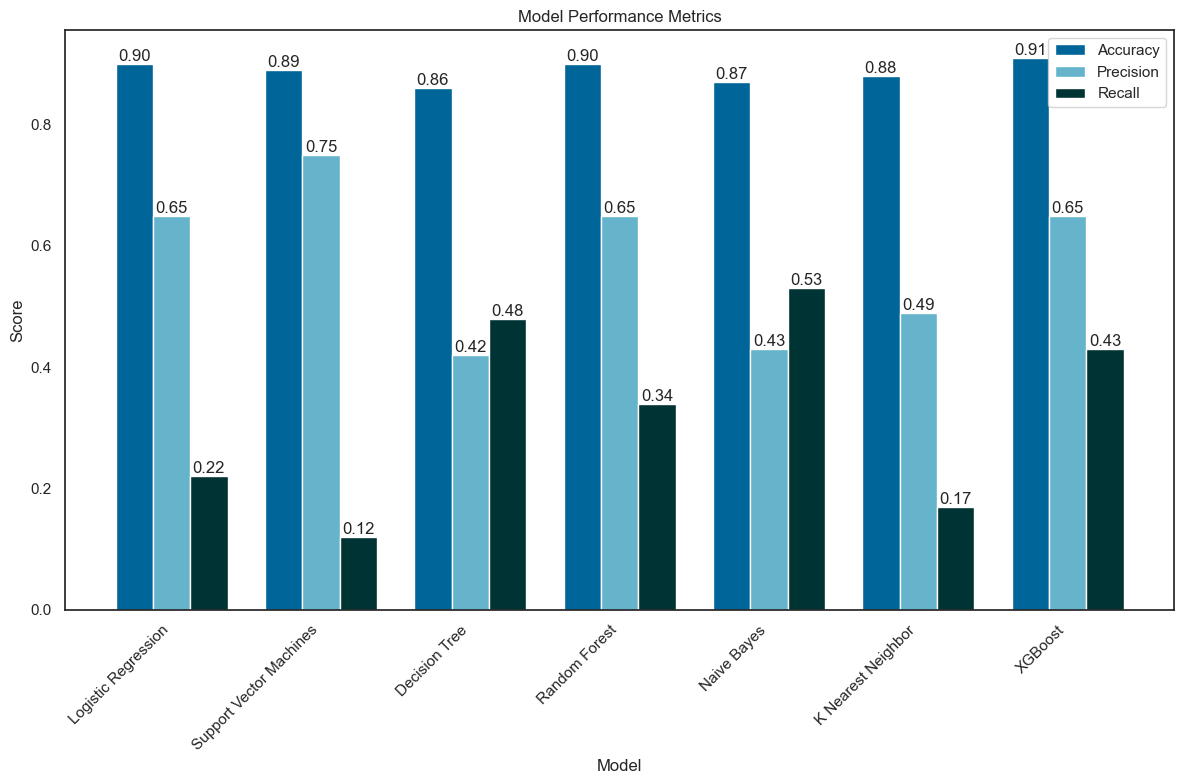

In [154]:
# Model Performance Metrics

# Create a DataFrame with the metrics
data = {
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree','Random Forest', 'Naive Bayes',  'K Nearest Neighbor', 'XGBoost'],
    'Accuracy': [0.90, 0.89, 0.86, 0.90, 0.87, 0.88, 0.91],
    'Precision': [0.65, 0.75, 0.42, 0.65, 0.43, 0.49, 0.65],
    'Recall': [0.22, 0.12, 0.48, 0.34, 0.53, 0.17, 0.43]
}

df = pd.DataFrame(data)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(df['Model']))

# Get the 'ocean_r' colormap
cmap = plt.get_cmap('ocean_r')

# Plot bars for each metric
bar1 = ax.bar(index - bar_width, df['Accuracy'], bar_width, label='Accuracy', color=cmap(0.4))  # Adjust color
bar2 = ax.bar(index, df['Precision'], bar_width, label='Precision', color=cmap(0.2))  # Adjust color
bar3 = ax.bar(index + bar_width, df['Recall'], bar_width, label='Recall', color=cmap(0.8))  # Adjust color

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index)
ax.set_xticklabels(df['Model'], rotation=45, ha='right')
ax.legend()

# Add decimal numbers for each bar
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

# Add labels for each metric
add_bar_labels(bar1)
add_bar_labels(bar2)
add_bar_labels(bar3)

# Display the bar chart
plt.tight_layout()
plt.show()

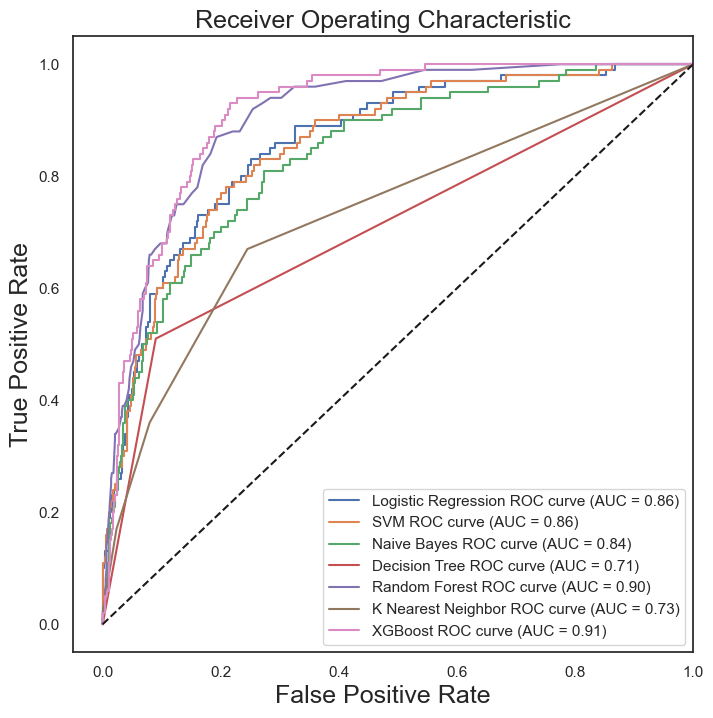

In [155]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': LinearSVC(max_iter=10000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbor': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

# Fit models and compute ROC metrics
roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    roc_curves[name] = (fpr, tpr, roc_auc)

# Plot ROC curves
plt.figure(figsize=[8, 8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)

for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.legend(loc="lower right")
plt.show()

### Test and Train time for all classifiers

In [156]:
# Train and evaluate each classifier
import time
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': LinearSVC(max_iter=10000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbor': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

# Dictionary to store training and prediction times
times = {name: {'train_time': None, 'test_time': None} for name in classifiers}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Measure training time
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    test_time = end_time - start_time

    # Store the times
    times[name]['train_time'] = train_time
    times[name]['test_time'] = test_time

# Convert times dictionary to DataFrame for better visualization
times_df = pd.DataFrame(times).T
print(times_df)

                     train_time  test_time
Logistic Regression    0.042595   0.000000
SVM                    0.008522   0.000999
Naive Bayes            0.006518   0.001010
Decision Tree          0.039254   0.000978
Random Forest          0.962287   0.014464
K Nearest Neighbor     0.001008   0.102314
XGBoost                0.424873   0.003509


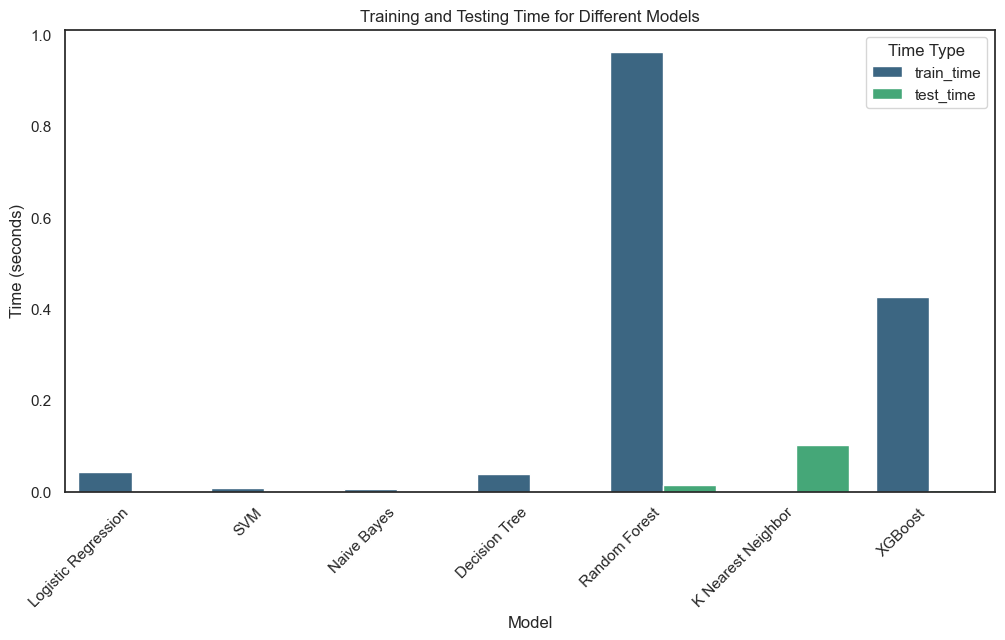

In [157]:
# Prepare the DataFrame for plotting
times_df.reset_index(inplace=True)
times_df.rename(columns={'index': 'Model'}, inplace=True)
times_df = times_df.melt(id_vars='Model', value_vars=['train_time', 'test_time'], var_name='Time Type', value_name='Time')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Time', hue='Time Type', data=times_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Training and Testing Time for Different Models')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.legend(title='Time Type')
plt.show()

## GridSearchCV

In [158]:
# Import necessary library
from sklearn.model_selection import GridSearchCV

In [159]:
# Random Forest parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# XGBoost parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

### 1. Random Forest Classifier Using GridSearchCV

In [160]:
# Hyperparameter Tuning for Random Forest Classifier Using GridSearchCV
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, 
                       scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

# Predict and evaluate the best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.8984696699394107
Accuracy: 0.9019607843137255


In [163]:
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with the RandomForestClassifier
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf_clf = grid_search.best_estimator_

# Predictions using the best model
y_pred_rf = best_rf_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print("Random Forest Classifier Using GridSearchCV:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Using GridSearchCV:
Accuracy: 0.9020
Precision: 0.8869
Recall: 0.9020
F1 Score: 0.8884

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       767
           1       0.64      0.34      0.44       100

    accuracy                           0.90       867
   macro avg       0.78      0.66      0.70       867
weighted avg       0.89      0.90      0.89       867



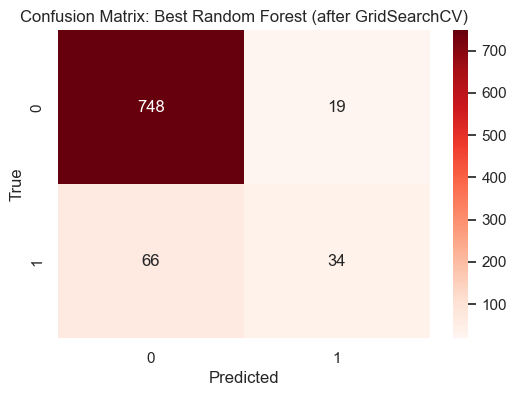

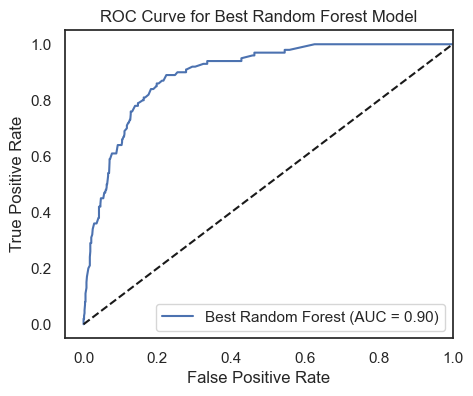

In [164]:
# Evaluation for the best Random Forest model
y_score_rf_best = best_rf.predict_proba(X_test)[:, 1]

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), fmt='d', annot=True, cmap='Reds')
plt.title('Confusion Matrix: Best Random Forest (after GridSearchCV)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Random Forest
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_score_rf_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

plt.figure(figsize=[5, 4])
plt.plot(fpr_rf_best, tpr_rf_best, label=f'Best Random Forest (AUC = {roc_auc_rf_best:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.show()

### 2. XG Boost Classifier Using GridSearchCV

In [165]:
# Hyperparameter Tuning for XG Boost Classifier Using GridSearchCV
grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, 
                        scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

# Predict and evaluate the best model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best score for XGBoost: 0.8993363025063313
Accuracy: 0.903114186851211


In [166]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV with the XGBoostClassifier
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best model from GridSearchCV
best_xgb_clf = grid_search_xgb.best_estimator_

# Predictions using the best model
y_pred_xgb = best_xgb_clf.predict(X_test)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print evaluation metrics
print("XGBoost Classifier Using GridSearchCV:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Using GridSearchCV:
Accuracy: 0.9008
Precision: 0.8858
Recall: 0.9008
F1 Score: 0.8882

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       767
           1       0.62      0.35      0.45       100

    accuracy                           0.90       867
   macro avg       0.77      0.66      0.70       867
weighted avg       0.89      0.90      0.89       867



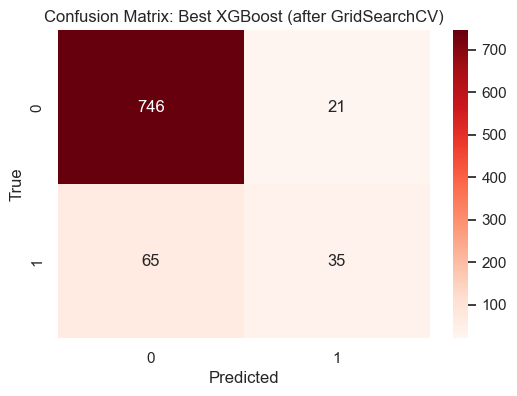

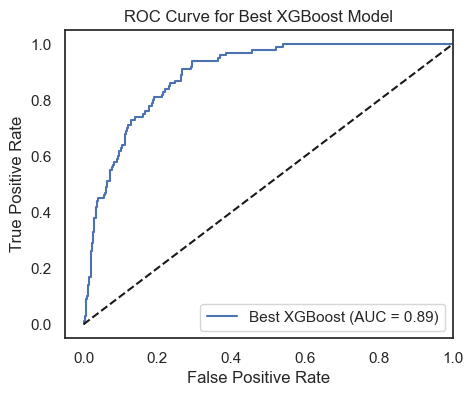

In [94]:
# Evaluation for the best XGBoost model
y_score_xgb_best = best_xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), fmt='d', annot=True, cmap='Reds')
plt.title('Confusion Matrix: Best XGBoost (after GridSearchCV)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for XGBoost
fpr_xgb_best, tpr_xgb_best, _ = roc_curve(y_test, y_score_xgb_best)
roc_auc_xgb_best = auc(fpr_xgb_best, tpr_xgb_best)

plt.figure(figsize=[5, 4])
plt.plot(fpr_xgb_best, tpr_xgb_best, label=f'Best XGBoost (AUC = {roc_auc_xgb_best:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best XGBoost Model')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.show()

### Feature Importance in Random Forest

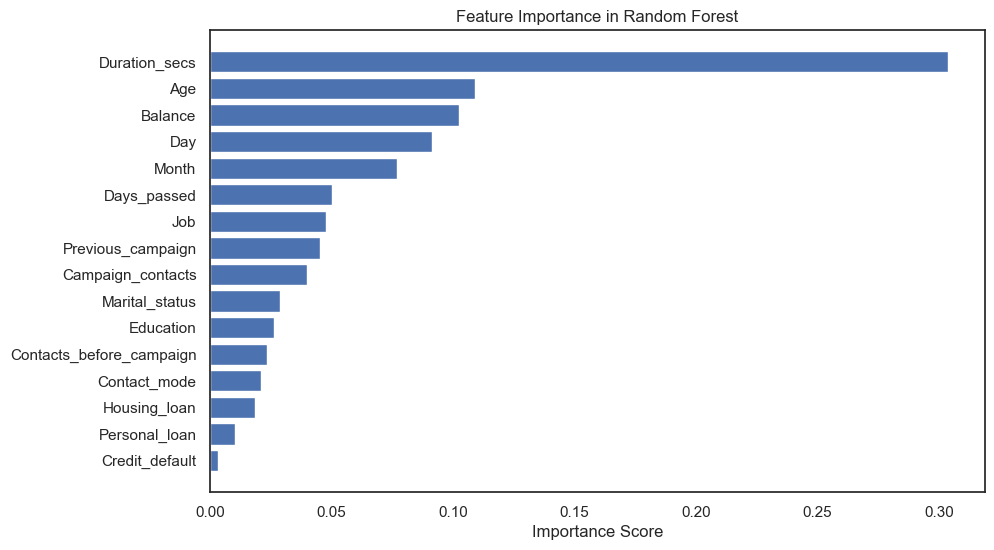

In [95]:
# Assuming X_train and y_train are your feature matrix and target variable
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Extract feature importance
importance = rf_clf.feature_importances_
rf_feature_names = X.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': rf_feature_names,  # Assuming features are indexed as integers
    'Importance': importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].astype(str), importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

### Feature Importance in XGBoost Classifier

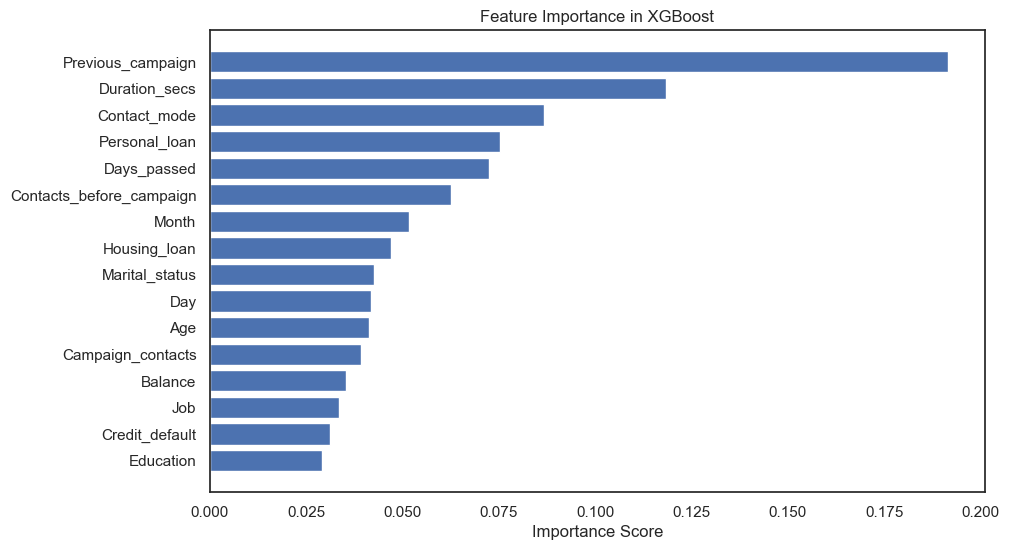

In [96]:
xgb_clf = XGBClassifier()  # Create XGBoost model
xgb_clf.fit(X_train, y_train)  # Fit the model

# Extract feature importance
importance = xgb_clf.feature_importances_
xgb_feature_names = X.columns  # Assuming X is your feature DataFrame

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': xgb_feature_names,  # Assuming features are indexed as integers
    'Importance': importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].astype(str), importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

### PCA

In [97]:
# Importing Libraries
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [98]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming X and y are defined and split into X_train, X_test, y_train, y_test

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA on scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train and evaluate the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[750  17]
 [ 66  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       767
           1       0.67      0.34      0.45       100

    accuracy                           0.90       867
   macro avg       0.79      0.66      0.70       867
weighted avg       0.89      0.90      0.89       867



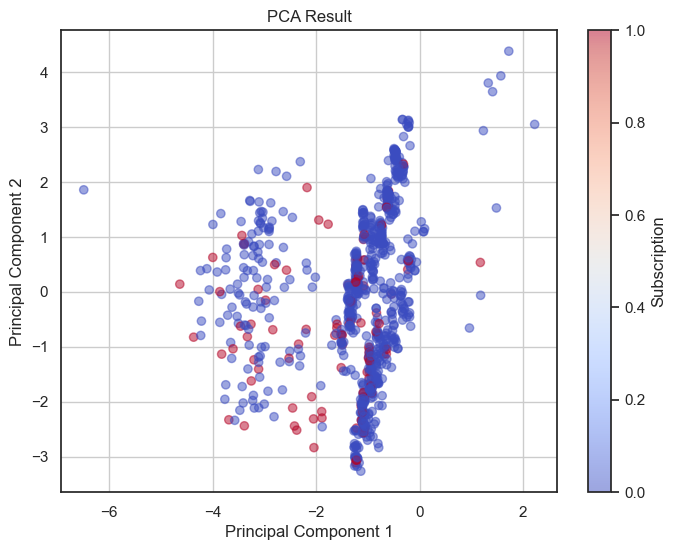

In [99]:
# Plot PCA Result
# Transform X_test for plotting PCA results if X_test is used for model testing
X_test_scaled = scaler.transform(X_test)  # Standardize X_test
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to X_test

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter, label='Subscription')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')  # Corrected from 'yl' to 'ylabel'
plt.grid(True)
plt.show()